In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, sqrt

def puntos_en_circulo(n):
    r = 400 * np.sqrt(np.random.rand(n))
    θ = 2 * np.pi * np.random.rand(n)
    x = 450 + r * np.cos(θ)
    y = 450 + r * np.sin(θ)
    return np.column_stack((x, y)).astype(int)

def graficar_elipses(rgb, angulos, pixeles):  # angulos: radianes (72 valores)
    puntos = puntos_en_circulo(pixeles)
    c = ('r', 'b', 'g')

    filas = ceil(sqrt(pixeles))
    cols = ceil(pixeles / filas)
    θ = np.linspace(0, 2*np.pi, 360)
    fig, axs = plt.subplots(filas, cols, subplot_kw={'projection': 'polar'}, figsize=(4*cols, 4*filas))
    axs = np.array(axs).reshape(-1)

    for ax, (x, y) in zip(axs, puntos):
        if x >= rgb.shape[1] or y >= rgb.shape[2]:
            continue  # salta puntos fuera de la imagen

        for i in range(3):
            I = rgb[:, x, y, i]
            ax.plot(angulos, I, color=c[i])

            Emax = np.max(I)
            Emin = np.min(I)
            i_max = np.argmax(I)
            i_min = np.argmin(I)
            ψ_max = angulos[i_max]
            ψ_min = angulos[i_min]

            # Lleva los ángulos al intervalo [0, π]
            ψ_max = ψ_max % np.pi
            ψ_min = ψ_min % np.pi

            # Estima ψ central
            if ψ_min < ψ_max:
                ψ = (ψ_max + ψ_min + np.pi/2) / 2
            else:
                ψ = (ψ_max + ψ_min - np.pi/2) / 2

            eps = 1e-6
            if Emax > eps and Emin > eps:
                rθ = 1 / np.sqrt((np.cos(θ - ψ) / Emax) ** 2 + (np.sin(θ - ψ) / Emin) ** 2)
                ax.plot(θ, rθ, color=c[i], linestyle=':')
            else:
                ax.plot([ψ, ψ], [0, Emax], color=c[i], linestyle=':')
                ax.plot([ψ + np.pi, ψ + np.pi], [0, Emax], color=c[i], linestyle=':')

        ax.set_title(f"({x},{y})", fontsize=9)
        ax.set_xticks([])
        ax.set_yticks([])

    for ax in axs[pixeles:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


IndexError: index 735 is out of bounds for axis 2 with size 692

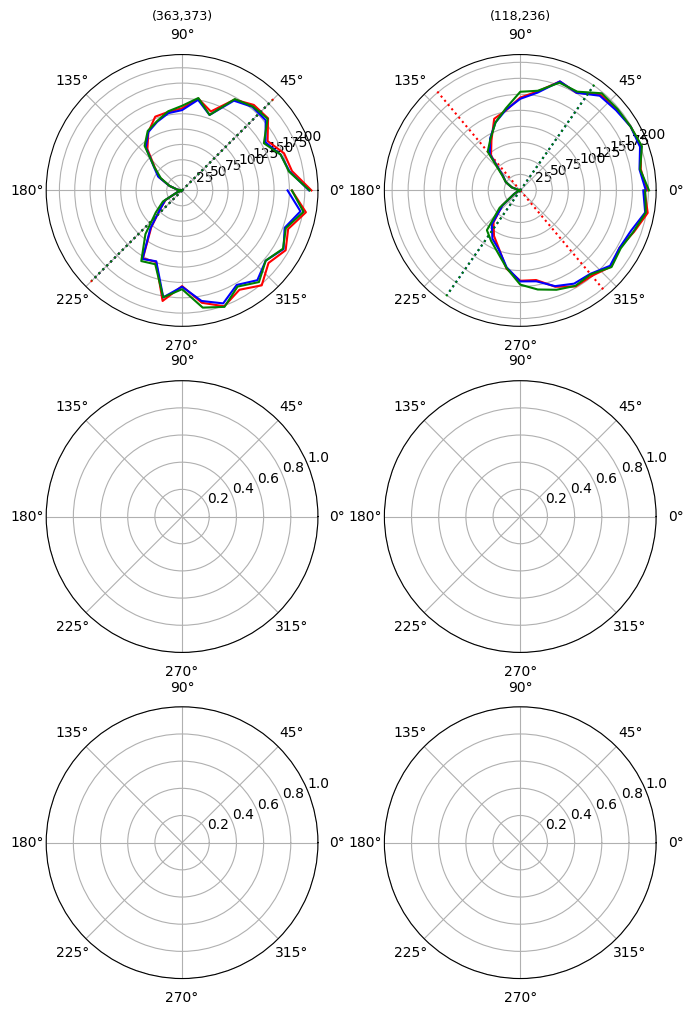

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread



rgb=[]
angulos = np.linspace(0, 2*np.pi, 37)

# Se cargan las imagenes en una lista y luego se convierte en stack.
for i in range(37):
    rgb.append(imread(f"images/{i}.png")[:,:,:])
rgb = np.stack(rgb)
size=rgb[1,:,:,0].shape

# Graficos polares 9 pixeles al hazar 
graficar_elipses(rgb,angulos,6)

# Se crean las arrays para las variables 
Emax=np.zeros(size)
Emin=np.zeros(size)
ψ=np.zeros(size)
cmaps=('Reds','Blues','Greens')

# Se hace para rgb (0,1,2)
for colores in (0,1,2):
    #Se recorre el mismo pixel en cada imagen y se encuentra el campo maximo, el minimo y el angulo correspondiente al maximo
    for m in range(size[0]):   # imagen (M,N) 
        for n in range(size[1]): # imagen (M,N)
            #plt.subplot(projection='polar')
            #plt.plot(angulos, rgb[:,m, n], color='r')
            Emax[m,n]=max(rgb[:,m, n,colores])
            Emin[m,n]=min(rgb[:,m, n,colores])
            indice_max = np.argmax(rgb[:, m, n,colores])
            ψ[m,n]=angulos[indice_max]
        #plt.show()
    
    #GRAFICAS

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    # Emax
    im0 = axs[0].imshow(Emax, cmap=cmaps[colores])
    fig.colorbar(im0, ax=axs[0])
    axs[0].axis('off')
    axs[0].set_title("Emax")

    # Emin
    im1 = axs[1].imshow(Emin, cmap=cmaps[colores])
    fig.colorbar(im1, ax=axs[1])
    axs[1].axis('off')
    axs[1].set_title("Emin")

    # Excentricidad
    e = np.zeros_like(Emax)
    mask = Emax > 1e-3
    e[mask] = np.sqrt(1 - (Emin[mask] / Emax[mask])**2)

    im2 = axs[2].imshow(e, cmap=cmaps[colores], vmin=0, vmax=1)
    fig.colorbar(im2, ax=axs[2])
    axs[2].axis('off')
    axs[2].set_title("Excentricidad")

    # Inclinación (ψ en grados)
    ψ=ψ * 180 / np.pi
    ψ = np.where(ψ > np.pi, ψ - np.pi, ψ)

    
    im3 = axs[3].imshow(ψ , cmap=cmaps[colores], vmin=0, vmax=180)
    fig.colorbar(im3, ax=axs[3])
    axs[3].axis('off')
    axs[3].set_title("Inclinación (°)")

    plt.tight_layout()
    plt.show()


<!--  -->

Los puntos donde la excentricidad es 1 se tienen cuando la luz esta linealmente polarizada, que ademas coincide con los puntos donde $E_{min}\approx 0$. Mientras que los puntos con poca excentricidad tienden a ser circulos 

### 7. Conclusiones

Durante la práctica se logró analizar el estado de polarización elíptica inducido por tensiones internas en una escuadra de acrílico utilizando el fenómeno de fotoelasticidad. A partir de 37 imágenes tomadas a distintos ángulos del polarizador analizador, se procesaron los datos RGB para obtener, en cada punto seleccionado, la intensidad de luz transmitida en función del ángulo. Esto permitió determinar la amplitud máxima y mínima del campo eléctrico y la orientación del eje mayor de la elipse de polarización. Se generaron representaciones polares para 6 píxeles seleccionados y se construyeron mapas espaciales de $E_{\text{max}}$, $E_{\text{min}}$, excentricidad e inclinación para cada canal de color. Estas visualizaciones permitieron observar cómo varía el estado de polarización en todo el campo de visión.